In [3]:
# !wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

--2024-10-20 19:40:34--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [       <=>          ] 999.85K   744KB/s    in 1.3s    

2024-10-20 19:40:36 (744 KB/s) - ‘bank+marketing.zip’ saved [1023843]



In [4]:
# !unzip bank+marketing.zip 

Archive:  bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     


In [5]:
# !unzip bank.zip

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('bank-full.csv', delimiter=';')

# Display the first few rows to ensure the dataset is loaded properly
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
# Define the columns we need for the task
columns = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 
           'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

# Filter the dataset to keep only the selected columns
df = df[columns]

# Check the shape of the dataset to confirm the filtering
df.shape


(45211, 15)

In [3]:
# First, split into train+val and test (80% train+val, 20% test)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

# Now, split the remaining 80% into train (60%) and validation (20%)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Check the sizes of the splits
print(f"Train set: {len(df_train)}")
print(f"Validation set: {len(df_val)}")
print(f"Test set: {len(df_test)}")


Train set: 27126
Validation set: 9042
Test set: 9043


In [12]:
# Run this code every time solve questions: 1, 2 ,3, 4

import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('bank-full.csv', delimiter=';')

# Display the first few rows to ensure the dataset is loaded properly
df.head()


# Define the columns we need for the task
columns = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 
           'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

# Filter the dataset to keep only the selected columns
df = df[columns]

# Check the shape of the dataset to confirm the filtering
df.shape


# First, split into train+val and test (80% train+val, 20% test)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

# Now, split the remaining 80% into train (60%) and validation (20%)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Check the sizes of the splits
print(f"Train set: {len(df_train)}")
print(f"Validation set: {len(df_val)}")
print(f"Test set: {len(df_test)}")




Train set: 27126
Validation set: 9042
Test set: 9043


## Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that
- For each numerical variable, use it as score (aka prediction) and compute the AUC with the y variable as ground truth.
- Use the training dataset for that
- 
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?
- balance
- day
- duration
- previous

In [5]:
import pandas as pd
from sklearn.metrics import roc_auc_score

# Assuming df_train has been split and target variable 'y' is already binary (1 for 'yes', 0 for 'no')
df_train['y'] = df_train['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Function to compute AUC and invert the feature if AUC < 0.5
def compute_auc(feature, df):
    auc = roc_auc_score(df['y'], df[feature])
    if auc < 0.5:
        auc = roc_auc_score(df['y'], -df[feature])  # Invert if AUC < 0.5
    return auc

# List of numerical features to evaluate
numerical_features = ['balance', 'day', 'duration', 'previous']

# Compute the AUC for each feature
for feature in numerical_features:
    auc = compute_auc(feature, df_train)
    print(f"{feature}: AUC = {auc:.3f}")


balance: AUC = 0.589
day: AUC = 0.526
duration: AUC = 0.815
previous: AUC = 0.599


### Answer: duration

## Question 2: Training the model

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)
- 0.69
- 0.79
- 0.89
- 0.99

In [8]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Convert target 'y' to binary (1 for 'yes', 0 for 'no')
df_train['y'] = df_train['y'].apply(lambda x: 1 if x == 'yes' else 0)
df_val['y'] = df_val['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Feature columns
features = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 
            'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']

# Convert to dictionaries
train_dicts = df_train[features].to_dict(orient='records')
val_dicts = df_val[features].to_dict(orient='records')

# Apply one-hot encoding using DictVectorizer
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

# Train logistic regression model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, df_train['y'])

# Predict probabilities on validation set
y_pred_val = model.predict_proba(X_val)[:, 1]

# Compute AUC on validation set
auc_val = roc_auc_score(df_val['y'], y_pred_val)
print(f"AUC on the validation set: {auc_val:.3f}")


AUC on the validation set: 0.900


### Answer: 0.89

## Question 3: Precision and Recall

Now let's compute precision and recall for our model.
- Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
- For each threshold, compute precision and recall
- Plot them

At which threshold precision and recall curves intersect?
- 0.265
- 0.465
- 0.665
- 0.865

In [10]:
# Convert target 'y' to binary (1 for 'yes', 0 for 'no') for both training and validation datasets
df_train['y'] = df_train['y'].apply(lambda x: 1 if x == 'yes' else 0)
df_val['y'] = df_val['y'].apply(lambda x: 1 if x == 'yes' else 0)


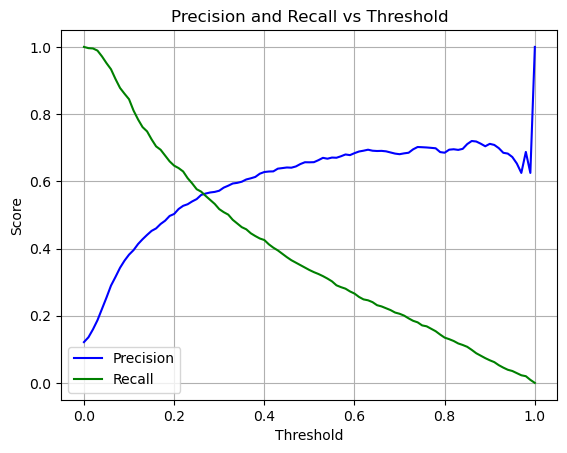

Precision and Recall curves intersect at threshold: 0.270


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# Predict probabilities for the positive class (label 1)
y_pred_val = model.predict_proba(X_val)[:, 1]

# Define thresholds from 0.0 to 1.0 with step 0.01
thresholds = np.arange(0.0, 1.01, 0.01)

# Initialize lists to store precision and recall values
precisions = []
recalls = []

# For each threshold, calculate precision and recall with zero_division=1
for t in thresholds:
    y_pred_threshold = (y_pred_val >= t).astype(int)
    precisions.append(precision_score(df_val['y'], y_pred_threshold, zero_division=1))
    recalls.append(recall_score(df_val['y'], y_pred_threshold))

# Plot precision and recall curves
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Find the threshold where precision and recall are closest
differences = np.abs(np.array(precisions) - np.array(recalls))
idx = np.argmin(differences)
intersection_threshold = thresholds[idx]
print(f"Precision and Recall curves intersect at threshold: {intersection_threshold:.3f}")


### Answer: 0.265

## Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

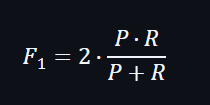

Where P is precision and R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?
- 0.02
- 0.22
- 0.42
- 0.62

In [14]:
# Convert target 'y' to binary (1 for 'yes', 0 for 'no') for both training and validation datasets
df_train['y'] = df_train['y'].apply(lambda x: 1 if x == 'yes' else 0)
df_val['y'] = df_val['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [15]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

# Predict probabilities for the positive class (label 1)
y_pred_val = model.predict_proba(X_val)[:, 1]

# Define thresholds from 0.0 to 1.0 with step 0.01
thresholds = np.arange(0.0, 1.01, 0.01)

# Initialize lists to store precision, recall, and F1 scores
precisions = []
recalls = []
f1_scores = []

# For each threshold, calculate precision, recall, and F1 score
for t in thresholds:
    y_pred_threshold = (y_pred_val >= t).astype(int)
    
    precision = precision_score(df_val['y'], y_pred_threshold, zero_division=1)
    recall = recall_score(df_val['y'], y_pred_threshold)
    
    precisions.append(precision)
    recalls.append(recall)
    
    # Calculate F1 score
    if precision + recall > 0:
        f1 = 2 * (precision * recall) / (precision + recall)
    else:
        f1 = 0
    f1_scores.append(f1)

# Convert lists to numpy arrays for easier indexing
f1_scores = np.array(f1_scores)

# Find the index of the maximum F1 score
max_f1_index = np.argmax(f1_scores)
best_threshold = thresholds[max_f1_index]

print(f"F1 score is maximal at threshold: {best_threshold:.2f}")


F1 score is maximal at threshold: 0.22


### Answer: 0.22

## Question 5: 5-Fold CV

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```
- Iterate over different folds of df_full_train
- Split the data into train and validation
- Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
- Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?
- 0.0001
- 0.006
- 0.06
- 0.26

In [16]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np

# Define categorical and numerical features
categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Store AUC scores
auc_scores = []

# Iterate over different folds
for train_idx, val_idx in kf.split(df_full_train):
    # Split data into training and validation sets for this fold
    df_train_fold = df_full_train.iloc[train_idx]
    df_val_fold = df_full_train.iloc[val_idx]
    
    # Prepare the data (features and target) for this fold
    X_train_fold = dv.transform(df_train_fold[categorical + numerical].to_dict(orient='records'))
    y_train_fold = df_train_fold['y'].values
    
    X_val_fold = dv.transform(df_val_fold[categorical + numerical].to_dict(orient='records'))
    y_val_fold = df_val_fold['y'].values
    
    # Train the logistic regression model
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train_fold, y_train_fold)
    
    # Predict probabilities on the validation set
    y_pred_val_fold = model.predict_proba(X_val_fold)[:, 1]
    
    # Calculate AUC for this fold
    auc = roc_auc_score(y_val_fold, y_pred_val_fold)
    auc_scores.append(auc)

# Convert list of AUC scores to a numpy array for easy calculations
auc_scores = np.array(auc_scores)

# Calculate the mean and standard deviation of the AUC scores
mean_auc = np.mean(auc_scores)
std_auc = np.std(auc_scores)

print(f'Mean AUC: {mean_auc:.3f}')
print(f'Standard Deviation of AUC: {std_auc:.6f}')


Mean AUC: 0.906
Standard Deviation of AUC: 0.005693


### Answer: 0.006

## Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter C
- Iterate over the following C values: [0.000001, 0.001, 1]
- Initialize KFold with the same parameters as previously
- Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
- Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?
- 0.000001 
- 0.001
- 1
  
If you have ties, select the score with the lowest std. If you still have ties, select the smallest C.

In [17]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np

# Define categorical and numerical features
categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# C values to iterate over
C_values = [0.000001, 0.001, 1]

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Store the results
results = []

# Iterate over different values of C
for C in C_values:
    auc_scores = []
    
    # Perform 5-fold cross-validation
    for train_idx, val_idx in kf.split(df_full_train):
        df_train_fold = df_full_train.iloc[train_idx]
        df_val_fold = df_full_train.iloc[val_idx]
        
        # Prepare the data (features and target)
        X_train_fold = dv.transform(df_train_fold[categorical + numerical].to_dict(orient='records'))
        y_train_fold = df_train_fold['y'].values
        
        X_val_fold = dv.transform(df_val_fold[categorical + numerical].to_dict(orient='records'))
        y_val_fold = df_val_fold['y'].values
        
        # Train the logistic regression model with the current value of C
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train_fold, y_train_fold)
        
        # Predict probabilities on the validation set
        y_pred_val_fold = model.predict_proba(X_val_fold)[:, 1]
        
        # Calculate AUC for this fold
        auc = roc_auc_score(y_val_fold, y_pred_val_fold)
        auc_scores.append(auc)
    
    # Calculate mean and std of AUC scores for this C
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)
    
    # Store the result (C, mean_auc, std_auc)
    results.append((C, mean_auc, std_auc))

# Print results
for C, mean_auc, std_auc in results:
    print(f'C={C}: Mean AUC={mean_auc:.3f}, Std AUC={std_auc:.3f}')

# Find the best C based on mean AUC, and if tied, based on the lowest std
best_C = sorted(results, key=lambda x: (-x[1], x[2], x[0]))[0]  # Sort by mean_auc (descending), then std_auc (ascending), then C (ascending)

print(f'Best C: {best_C[0]} with Mean AUC={best_C[1]:.3f} and Std AUC={best_C[2]:.3f}')


C=1e-06: Mean AUC=0.701, Std AUC=0.009
C=0.001: Mean AUC=0.861, Std AUC=0.007
C=1: Mean AUC=0.906, Std AUC=0.006
Best C: 1 with Mean AUC=0.906 and Std AUC=0.006


### Answer: 1